In [1]:
#importing libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [63]:
A = 2
N = 1000
x = np.linspace(0, A , N + 1)
dx = x[1] - x[0]
hbar = 1
m = 1
c = 1

In [64]:
#Rather than creating a hamiltionian matrix directly with a loop, i will create the operator first, like this
H_dash = np.diag(-2*np.ones(N-1)) +  np.diag(1*np.ones(N-2),1) +  np.diag(1*np.ones(N-2),-1) 

#So this is our Hamiltionian matrix
H = (-(hbar**2) / (2 * m)) * (1/dx**2) * H_dash

#We will solve the matrix by finding the corresponding eigenvalues and eigenvectors
E , psi = np.linalg.eigh(H)

#Since our eigenvectors psi are in form of array, we transpose to be able to access our eigenvectors easily using indexes
psi = psi.T

In [65]:
#These psi are not normalized so we divide them by their magnitudes, for that we calculate their magnitudes
def integ(f,axis = 0):
    return np.sum(f*dx,axis = axis)
mag = integ(psi**2)

psi = psi/np.sqrt(mag)

Enter the number of energy levels to plot:  0.1


Invalid input. Please enter a valid integer.


Enter the number of energy levels to plot:  0.5


Invalid input. Please enter a valid integer.


Enter the number of energy levels to plot:  3


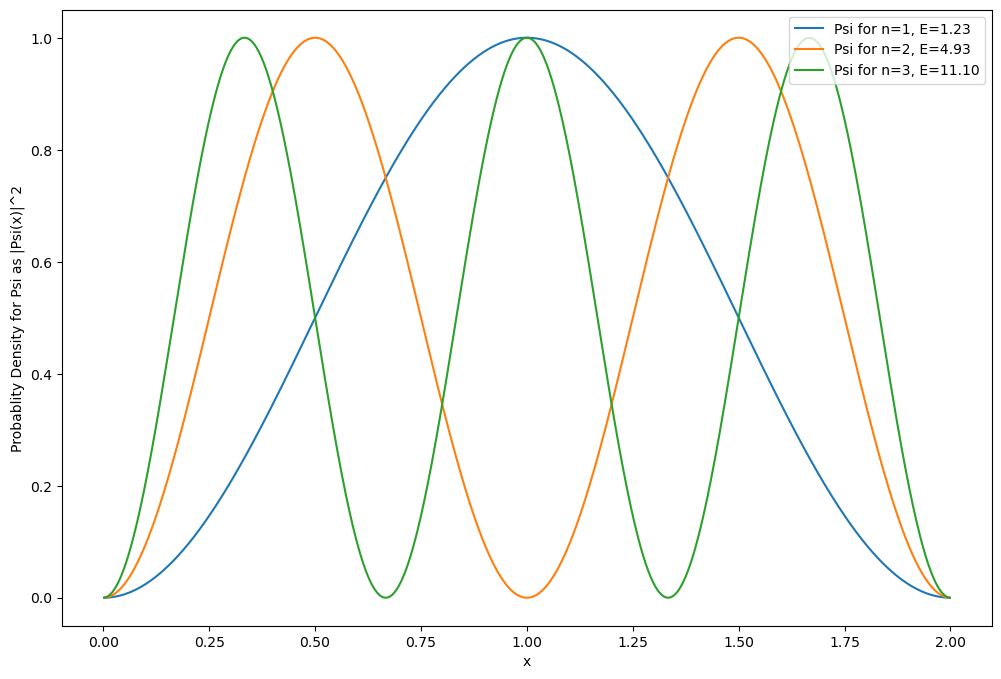

In [92]:
#Now we proceed to plot our psi[i]
#I have created it as an input but for that I set up some constraints so it proceeds to give an error for non int or out of bound values

while True:
    try:
        n_levels = int(input("Enter the number of energy levels to plot: "))
        if n_levels > 0 and n_levels <= len(psi):
            break
        else:
            print(f"Please enter a number between 1 and {len(psi)}.")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

plt.figure(figsize = (12,8))

#Setting up a loop to plot every psi that lies in the told number of energy level

for i in range(n_levels):
    plt.plot(x[1:-1] , psi[i]**2, label = f"Psi for n={i+1}, E={E[i]:.2f}")
    plt.xlabel("x")
    plt.ylabel("Probablity Density for Psi as |Psi(x)|^2")
    plt.legend(loc="upper right")